In [12]:
import pandas as pd
import os

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

# 7.1 Agglomerative cluster analysis

In [13]:
# subset the df
# filter by Tejo and Douro basin
df = df[ (df['Catchment_name'] == 'Tejo') | (df['Catchment_name'] == "Douro")]

# choose the columns that contain environmental variables
columns = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[columns]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul
0,1253,13.406,1603.519424,640.327779,9.3,0.6,18.9
1,1155,9.398,1578.678579,633.238847,10.1,1.2,19.6
2,1074,8.186,1553.219128,625.841858,10.1,1.2,19.5
3,1018,11.736,1539.684999,622.111415,10.3,1.7,20.0
4,979,2.670,1493.914010,608.146170,10.6,1.8,20.2
...,...,...,...,...,...,...,...
883,38,0.100,704.675069,515.039678,17.1,10.3,23.8
884,26,0.100,702.673201,516.097287,17.1,10.4,23.6
885,20,0.100,697.730192,518.386401,16.7,10.8,22.9
886,13,0.100,679.784324,556.028518,16.7,10.9,22.7


In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    affinity='manhattan', # equivalent to 'cityblock'
                                    linkage='average')
cluster5.fit_predict(df)
group5_labels = cluster5.labels_
group5_labels # labels of each group of objects (each line in df)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 3, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    affinity='euclidean', # equivalent to 'cityblock'
                                    linkage='ward')
cluster5.fit_predict(df)
group5_labels = cluster5.labels_
group5_labels # labels of each group of objects (each line in df)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 4, 0, 4, 4,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 4, 4, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1,
       4, 4, 4, 4, 1, 4, 1, 1, 1, 1, 3, 4, 1, 4, 1, 3, 4, 1, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 3, 0, 0, 0, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 0, 0, 4, 3, 3, 3, 0, 0, 4, 1, 0, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1,

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    affinity='euclidean', # equivalent to 'cityblock'
                                    linkage='single')
cluster5.fit_predict(df)
group5_labels = cluster5.labels_
group5_labels # labels of each group of objects (each line in df)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters=5, 
                                    affinity='euclidean', # equivalent to 'cityblock'
                                    linkage='complete')
cluster5.fit_predict(df)
group5_labels = cluster5.labels_
group5_labels # labels of each group of objects (each line in df)

c:\Users\Utilizador\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 0, 4, 4, 4, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Plot heatmap

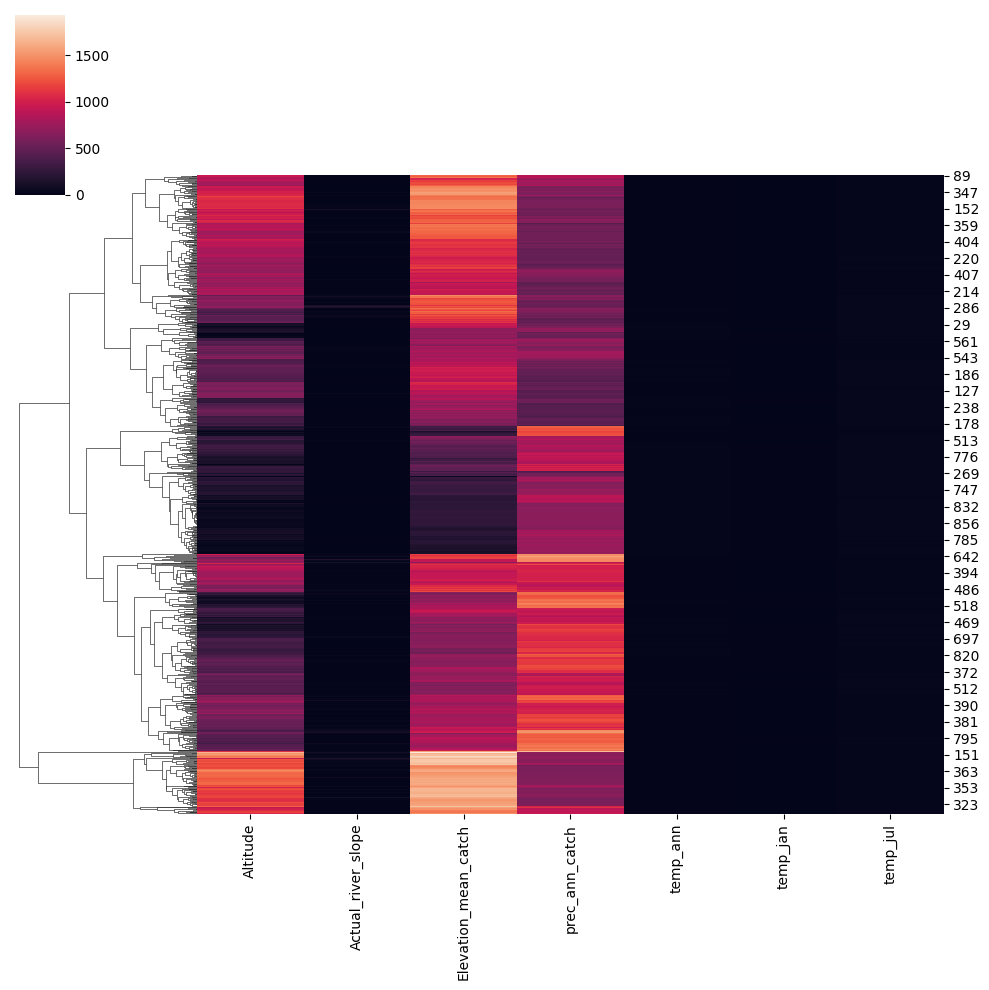

In [18]:
import seaborn as sns
sns.clustermap(df, col_cluster=False, row_cluster=True, method='average')